Olá, 

Meu nome é Ramon. Ao ao longo do texto farei algumas observações sobre melhorias no código. Nas partes em que não houver comentários, está tudo certo, ok? Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição
- Bons gráficos
- Boas análises e conclusões



Desejo sucesso na jornada. Parabéns pelo empenho.
</div>



# Projeto 13 - Previsões e Predições

## Rede de academias Model Fitness

### Passo 1 - Baixar Dados

In [1]:
#importar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
gym_churn_us = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
print(gym_churn_us.info()) #informações
print()
print(gym_churn_us.isnull().sum()) #quantidade de valores ausentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
#tranformar colunas com letras minusculas
gym_churn_us.columns = gym_churn_us.columns.str.lower()
print(gym_churn_us.info())
print(gym_churn_us.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

### Passo 2 - Realize análise exploratória dos dados (AED)

In [5]:
#1
#estatísticas descritivas (média, desvio padrão, etc.)
print(gym_churn_us.describe())

            gender  near_location      partner  promo_friends        phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

In [6]:
#2
#agrupar por churn (0 = ficou, 1 = saiu) e calcular a média
grouped_means = gym_churn_us.groupby('churn').mean()

# Exibir os resultados
print(grouped_means)

         gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                                     
0                               2.0

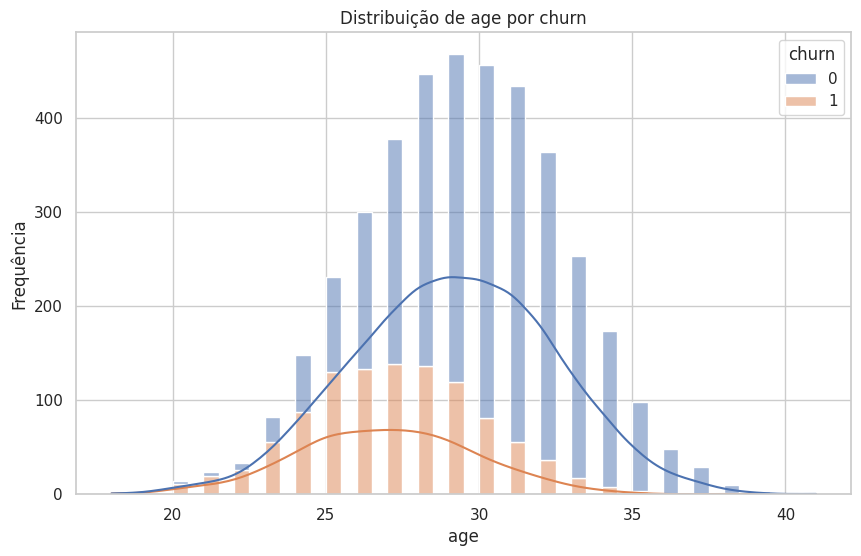

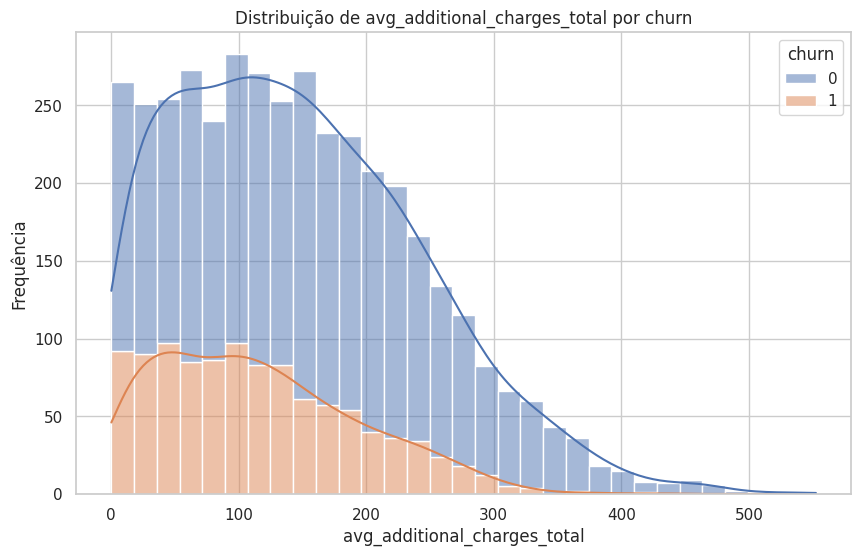

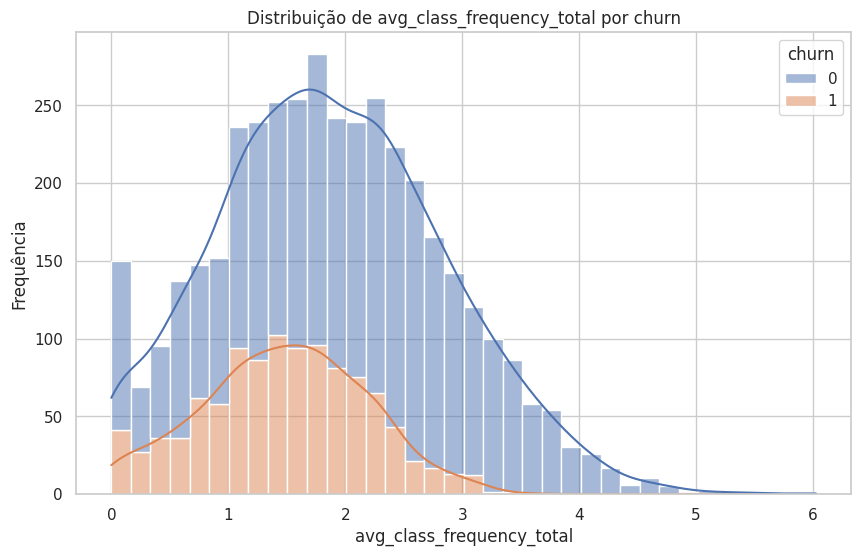

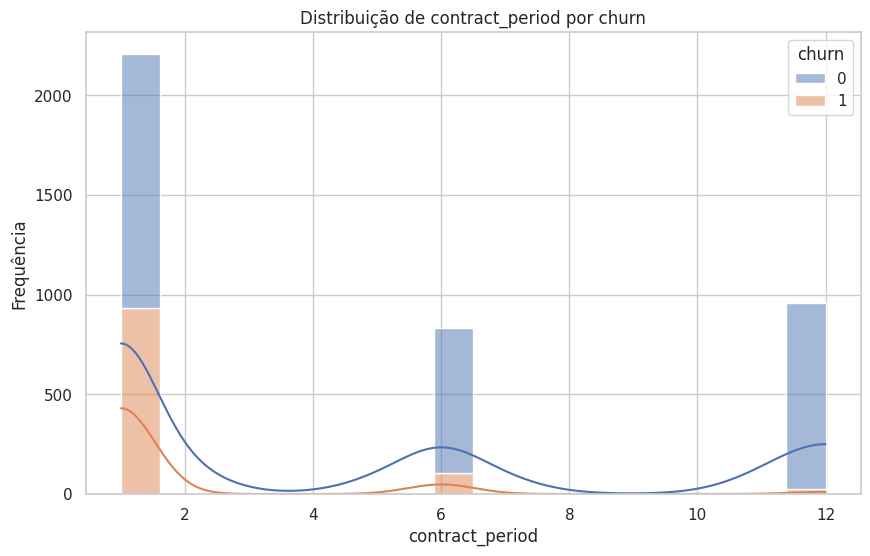

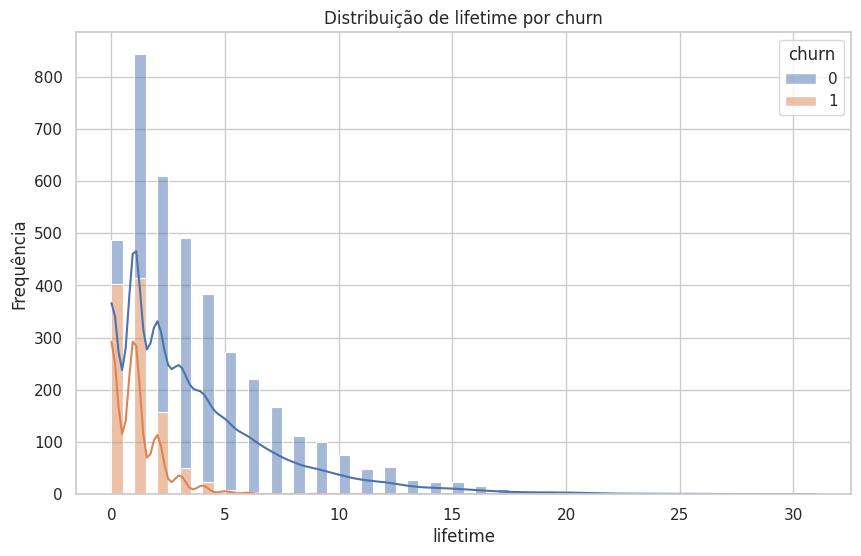

In [7]:
#3
#histograma
#estilo para os gráficos
sns.set(style="whitegrid")

#características para plotar
features = ['age', 'avg_additional_charges_total', 'avg_class_frequency_total', 'contract_period', 'lifetime']

# Criar para cada característica separada por rotatividade (churn)
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=gym_churn_us, x=feature, hue='churn', kde=True, multiple='stack')
    plt.title(f'Distribuição de {feature} por churn')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequência')
    plt.show()

- Visualizar as distribuições de características dos clientes que saíram (churn = 1) e dos que ficaram (churn = 0).
- Cada histograma mostra a distribuição de uma característica separada por rotatividade (churn), permitindo que vejamos como as características diferem entre aqueles que saíram e aqueles que ficaram.

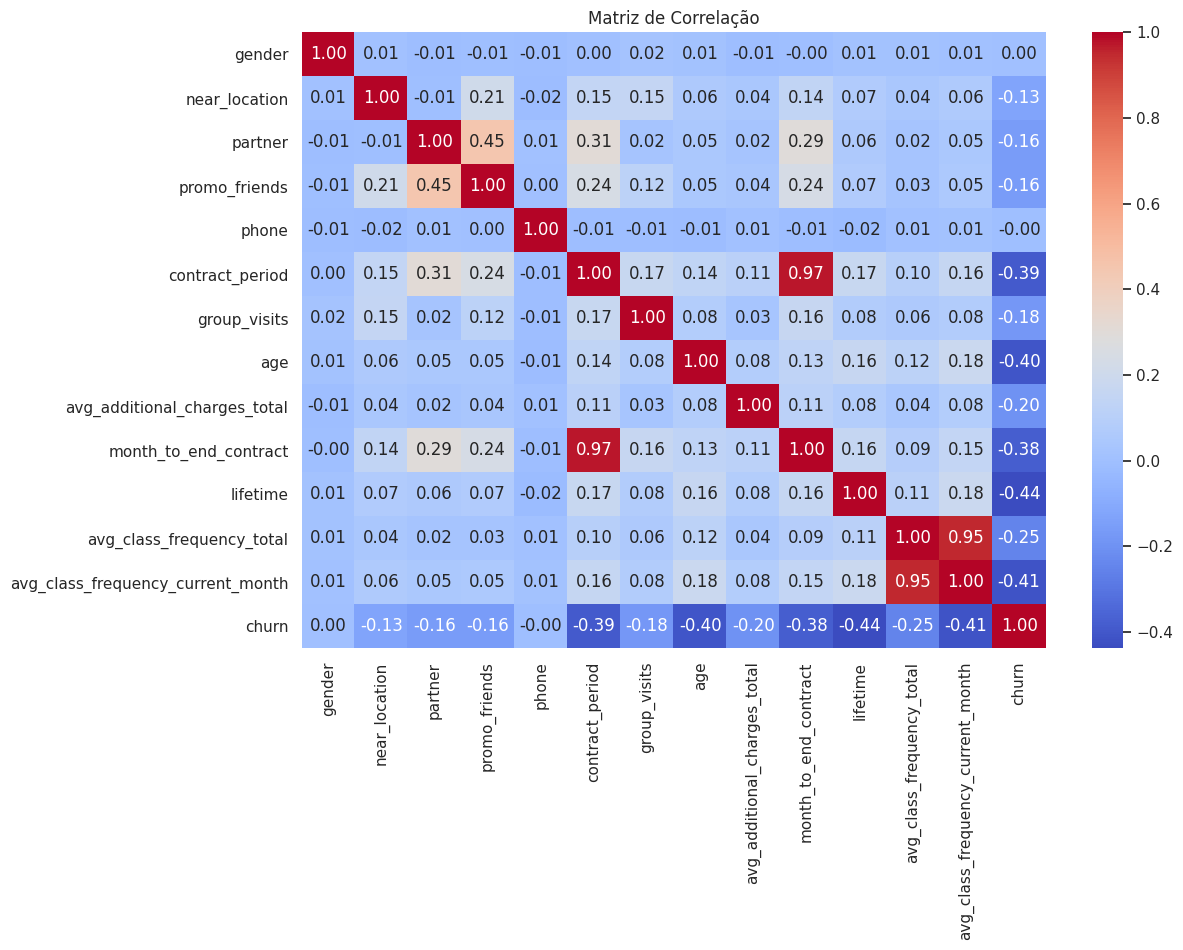

In [8]:
#4
#matriz de correlação
corr_matrix = gym_churn_us.corr()

#matriz de correlação como um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação')
plt.show()

- Valores próximos de 1 indicam uma forte correlação positiva, enquanto valores próximos de -1 indicam uma forte correlação negativa. Isso ajuda a identificar padrões e possíveis relações entre as variáveis (por exemplo, se a idade está fortemente correlacionada com o churn ou não).

### Passo 3 - Construa um modelo para predizer a rotatividade de clientes

In [9]:
#Dividir os Dados em Conjuntos de Treinamento e Validação

#definir as variáveis independentes (features) e a variável dependente (target)
X = gym_churn_us.drop(columns=['churn'])  # Todas as colunas exceto churn
y = gym_churn_us['churn']  # Churn é a variável objetivo

#conjunto de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
#Treinar o Modelo de Regressão Logística

#inicializar o modelo de regressão logística
log_model = LogisticRegression(random_state=42)

#treinar o modelo
log_model.fit(X_train, y_train)

#previsões no conjunto de validação
y_pred_log = log_model.predict(X_val)

#avaliar o desempenho
accuracy_log = accuracy_score(y_val, y_pred_log)
precision_log = precision_score(y_val, y_pred_log)
recall_log = recall_score(y_val, y_pred_log)

print(f'Regressão Logística - Acurácia: {accuracy_log:.2f}, Precisão: {precision_log:.2f}, Sensibilidade (Recall): {recall_log:.2f}')

Regressão Logística - Acurácia: 0.92, Precisão: 0.89, Sensibilidade (Recall): 0.78


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
#Treinar o Modelo de Floresta Aleatória

#modelo de Floresta Aleatória
rf_model = RandomForestClassifier(random_state=42)

#treinar o modelo
rf_model.fit(X_train, y_train)

#previsões no conjunto de validação
y_pred_rf = rf_model.predict(X_val)

#avaliar o desempenho
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)

print(f'Floresta Aleatória - Acurácia: {accuracy_rf:.2f}, Precisão: {precision_rf:.2f}, Sensibilidade (Recall): {recall_rf:.2f}')

Floresta Aleatória - Acurácia: 0.91, Precisão: 0.87, Sensibilidade (Recall): 0.79


In [12]:
#comparar resultados
print("Comparação de Modelos:")
print(f'Regressão Logística - Acurácia: {accuracy_log:.2f}, Precisão: {precision_log:.2f}, Sensibilidade (Recall): {recall_log:.2f}')
print(f'Floresta Aleatória - Acurácia: {accuracy_rf:.2f}, Precisão: {precision_rf:.2f}, Sensibilidade (Recall): {recall_rf:.2f}')

Comparação de Modelos:
Regressão Logística - Acurácia: 0.92, Precisão: 0.89, Sensibilidade (Recall): 0.78
Floresta Aleatória - Acurácia: 0.91, Precisão: 0.87, Sensibilidade (Recall): 0.79


Ambos os modelos, Regressão Logística e Floresta Aleatória, apresentam acurácia alta e resultados próximos. A Regressão Logística se destaca ligeiramente em acurácia (0.92) e precisão (0.89), sendo mais eficaz em prever corretamente quem sairá. Já a Floresta Aleatória tem sensibilidade (recall) superior (0.79), capturando mais clientes que sairão, ideal para minimizar a rotatividade. A escolha do modelo depende do objetivo: se a prioridade é reter mais clientes, a Floresta Aleatória é preferível; caso seja um equilíbrio entre precisão e acurácia, a Regressão Logística é recomendada.

### Passo 4 - Crie agrupamentos de clientes 

In [13]:
# Padronizar Dados
#selecionar as colunas numéricas para padronização
features = gym_churn_us.drop(columns=['churn'])

#padronizar os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#transformarpara um DataFrame para fácil interpretação
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

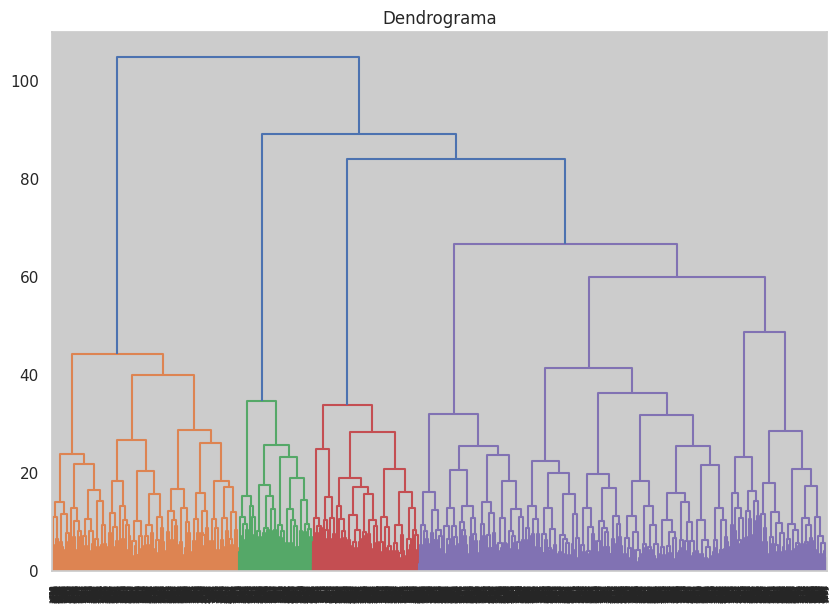

In [14]:
# Criar Matriz de Distâncias e Criar Dendrograma

#matriz de distâncias com o método 'ward'
linked = linkage(features_scaled_df, method='ward')

#dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.show()

In [15]:
# Treinar o Modelo K-means

#número de clusters (n=5)
kmeans = KMeans(n_clusters=5, random_state=42)

#treinar o modelo
kmeans.fit(features_scaled_df)

#adicionar a coluna de agrupamentos ao DataFrame original
gym_churn_us['cluster'] = kmeans.labels_

In [16]:
# Analisar os Valores Médios das Características para os Agrupamentos

#valores médios das características por agrupamento
cluster_means = gym_churn_us.groupby('cluster').mean()
print(cluster_means)

           gender  near_location   partner  promo_friends  phone  \
cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         contract_period  group_visits        age  \
cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster                                                                  
0  

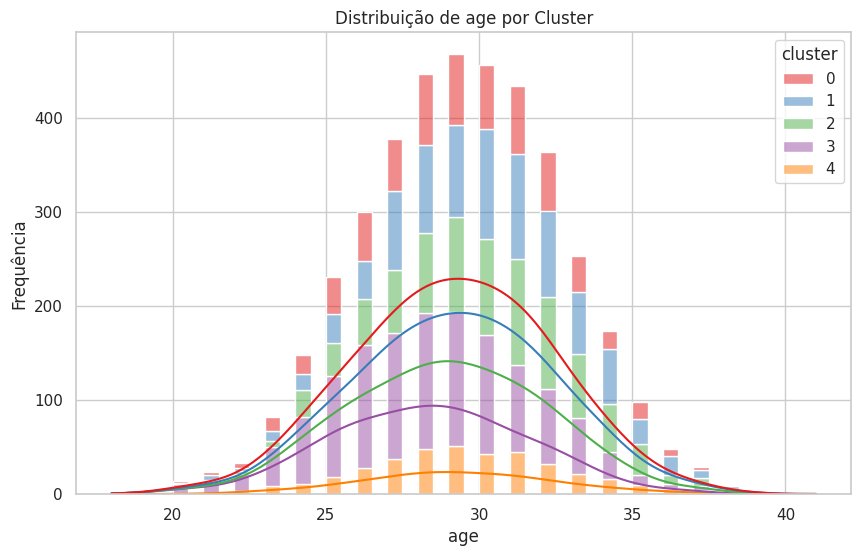

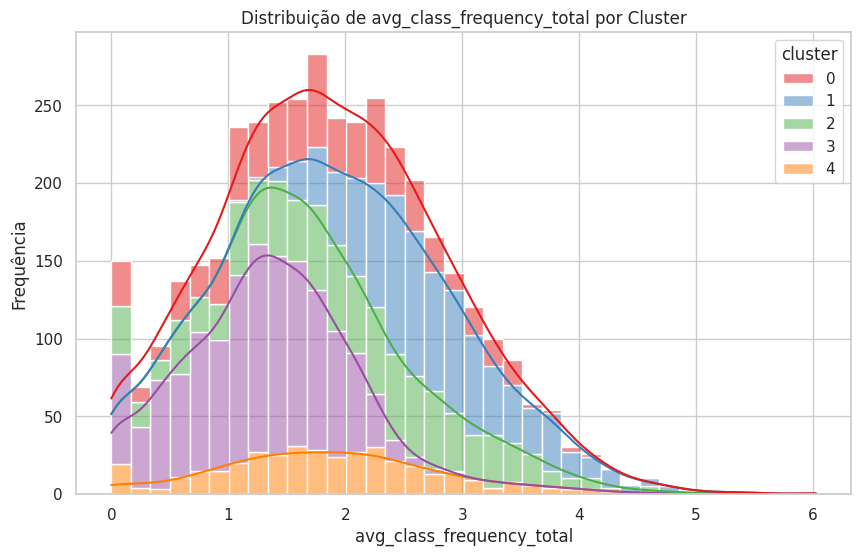

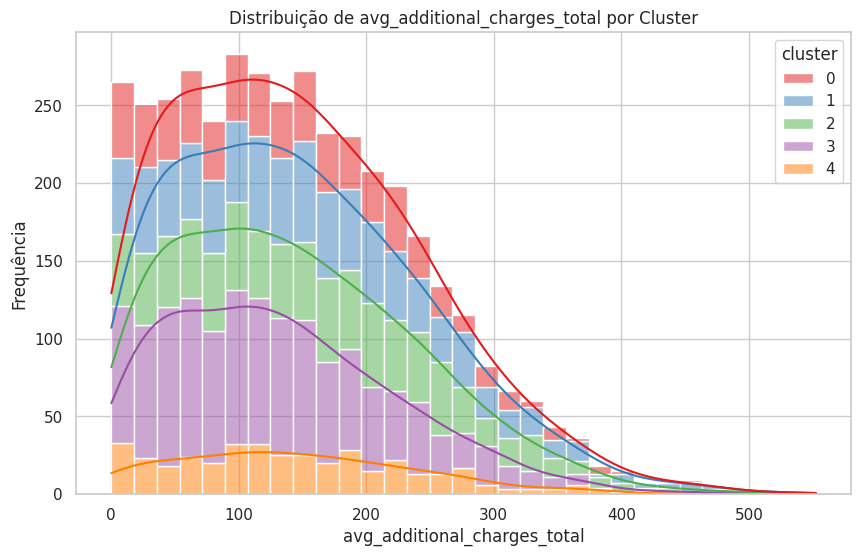

In [17]:
#Visualizar a Distribuição das Características para os Agrupamentos

features_to_plot = ['age', 'avg_class_frequency_total', 'avg_additional_charges_total']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=gym_churn_us, x=feature, hue='cluster', kde=True, palette='Set1', multiple='stack')
    plt.title(f'Distribuição de {feature} por Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.show()

In [18]:
# Calcular a Taxa de Rotatividade para Cada Agrupamento

#taxa de rotatividade por agrupamento
churn_rate_by_cluster = gym_churn_us.groupby('cluster')['churn'].mean()
print(churn_rate_by_cluster)

cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: churn, dtype: float64


- Clusters com maior frequência de visitas e maiores gastos adicionais podem ter taxas de rotatividade mais baixas.
- Clusters com menos visitas ou menor tempo de vida como clientes podem estar mais propensos a sair.
- Essas informações podem ser usadas para desenvolver estratégias de retenção específicas para cada grupo de clientes.

### Passo 5 - Chegue a conclusões e faça recomendações básicas sobre trabalhar com clientes

##### Segmentação com Base no Comportamento dos Clientes.

Conclusão: Os agrupamentos revelam que existem diferentes perfis de clientes com variação significativa em termos de idade, frequência de visitas e gastos adicionais. Alguns grupos estão mais engajados, enquanto outros têm baixa frequência de visitas e maior propensão à rotatividade.

Recomendação: Desenvolva campanhas de marketing segmentadas para cada grupo de clientes:
- Clientes com baixa frequência de visitas (alto risco de saída): Ofereça incentivos, como descontos em visitas futuras ou pacotes promocionais de longo prazo, para aumentar a frequência de uso.
- Clientes leais com alta frequência: Ofereça recompensas por fidelidade (pontos ou benefícios exclusivos) para reforçar o compromisso desses clientes.

##### Monitoramento de Clientes no Risco de Sair
Conclusão: É possível identificar com o agrupamento, clientes com alta taxa de rotatividade, caracterizados por uma menor utilização dos serviços e contratos de curto prazo.

Recomendação: Implemente um sistema de alerta de rotatividade:

- Monitore padrões de uso (como queda na frequência de visitas) para identificar clientes que podem estar em risco de cancelamento.
- Envie mensagens personalizadas para reengajar esses clientes, oferecendo ofertas especiais, lembretes amigáveis ou convites para eventos exclusivos.

##### Ofertas Personalizadas com Base nos Gastos
Conclusão: Os clientes que gastam mais em serviços adicionais (como aulas ou personal trainers) tendem a ser mais leais, enquanto os clientes que gastam menos têm uma maior probabilidade de sair.

Recomendação: Crie ofertas personalizadas com base nos gastos:

- Clientes de alto gasto: Ofereça benefícios exclusivos (como acesso a aulas avançadas ou pacotes de serviços premium) para mantê-los engajados e aumentar o valor do ticket médio.
- Clientes de baixo gasto: Ofereça promoções que incentivem a experimentação de serviços adicionais, como uma primeira aula gratuita de personal trainer.

##### Melhoria na Experiência de Novos Clientes
Conclusão: Novos clientes com contratos de curto prazo tendem a ter uma alta taxa de rotatividade, indicando que é crucial focar na retenção inicial.

Recomendação: Implemente um programa de boas-vindas:

- Durante os primeiros meses de adesão, ofereça orientações personalizadas, acompanhamento por consultores e aulas gratuitas para garantir que os novos clientes se sintam integrados.
- Envie check-ins regulares para verificar a satisfação e incentivar maior engajamento.